In [1]:
import nibabel as nib
import time
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.models.feature_extraction import create_feature_extractor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K


import segmentation_models_pytorch as smp

c:\Users\prabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['PID', 'image', 'label', 'tumorBorder', 'tumorMask']


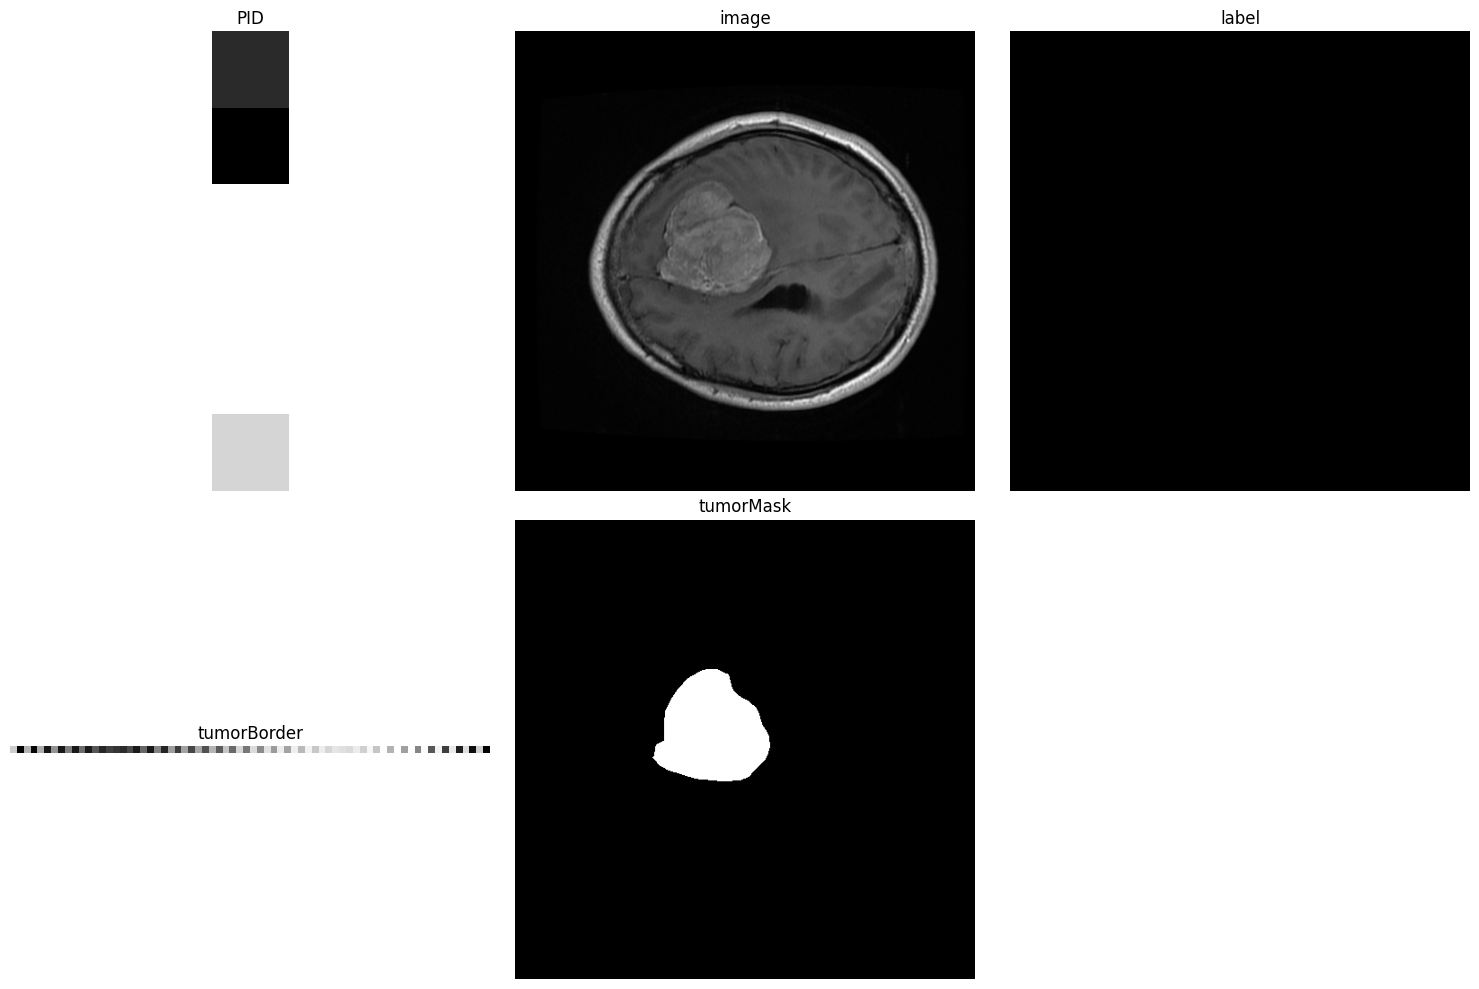

In [2]:
#####################################################  FOR .NIFTI FILE ########################################################################


# img = nib.load('mpr-3.nifti.hdr')
# img_array = img.get_fdata()
# print(img_array.shape)
# plt.subplot(121)
# plt.imshow(img_array[:,:,0], cmap='gray')
# plt.subplot(122)
# plt.imshow(img_array[:,:,80], cmap='gray')



#########################################################  FOR .MAT FORMAT FILE ##############################################################
# import h5py
# import matplotlib.pyplot as plt

# # Step 1: Open the .mat file and inspect the contents of 'cjdata'
# with h5py.File('3064.mat', 'r') as mat_file:
#     cjdata_contents = list(mat_file['cjdata'].keys())
#     print(cjdata_contents)  # List all items in 'cjdata'

# # Step 2: Define a function to visualize the data
# def visualize_data(key, data):
#     print(f"Key: {key}, Shape: {data.shape}, Dtype: {data.dtype}")
#     if data.ndim == 3:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(121)
#         plt.title(f'{key} - Slice 0')
#         plt.imshow(data[:,:,0], cmap='gray')
#         plt.subplot(122)
#         plt.title(f'{key} - Slice {data.shape[2]//2}')
#         plt.imshow(data[:,:,data.shape[2]//2], cmap='gray')
#     elif data.ndim == 2:
#         plt.figure()
#         plt.title(f'{key}')
#         plt.imshow(data, cmap='gray')
#     else:
#         print(f"{key} has unsupported dimensions for visualization.")
#     plt.show()

# # Step 3: Load and visualize each dataset in 'cjdata'
# with h5py.File('3064.mat', 'r') as mat_file:
#     for key in cjdata_contents:
#         data = mat_file[f'cjdata/{key}'][:]
#         visualize_data(key, data)


#######################################################################################################################


import h5py
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Open the .mat file and inspect the contents of 'cjdata'
with h5py.File('75.mat', 'r') as mat_file:
    cjdata_contents = list(mat_file['cjdata'].keys())
    print(cjdata_contents)  # List all items in 'cjdata'

# Step 2: Calculate the number of subplots needed
num_keys = len(cjdata_contents)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_keys + num_cols - 1) // num_cols  # Calculate rows needed

# Step 3: Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Step 4: Load and visualize each dataset in 'cjdata'
with h5py.File('75.mat', 'r') as mat_file:
    for i, key in enumerate(cjdata_contents):
        data = mat_file[f'cjdata/{key}'][:]
        ax = axes.flat[i]
        
        if data.ndim == 3:
            ax.imshow(data[:,:,data.shape[2]//2], cmap='gray')
            ax.set_title(f'{key} - Slice {data.shape[2]//2}')
        elif data.ndim == 2:
            ax.imshow(data, cmap='gray')
            ax.set_title(f'{key}')
        else:
            ax.text(0.5, 0.5, f"{key} unsupported dimensions", ha='center', va='center')
        
        ax.axis('off')

# Hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()






Image array shape: (512, 512)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

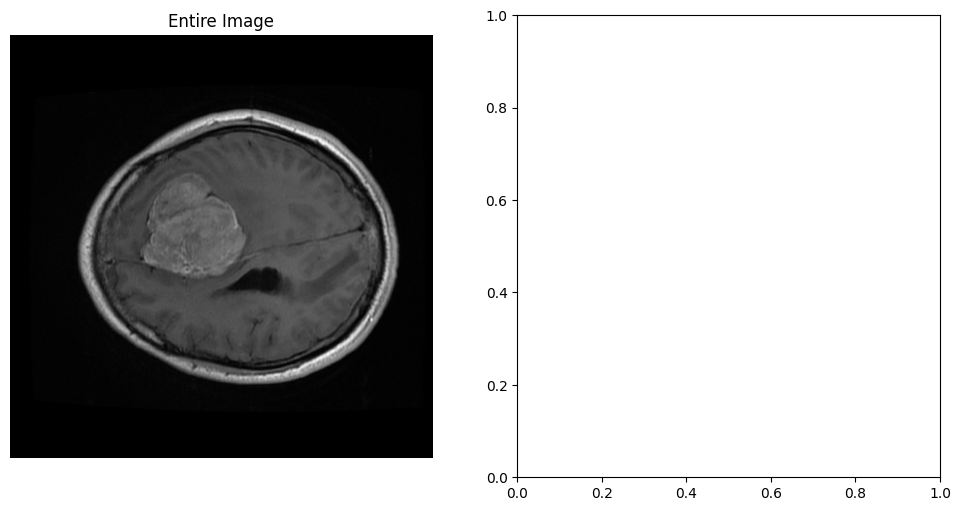

In [3]:
# import h5py
# import matplotlib.pyplot as plt

# # Load the .mat file and the image data within 'cjdata'
# with h5py.File('3064.mat', 'r') as mat_file:
#     img_array = mat_file['cjdata/image'][:]

# # Print the shape of the loaded image array
# print(f"Image array shape: {img_array.shape}")

# # Set the starting index of the slice to visualize
# i = 72

# # Create a figure with subplots for each slice
# plt.figure(figsize=(15, 5))

# plt.subplot(131)
# plt.imshow(img_array[40:215, 40:215], cmap='gray')
# plt.title(f'Slice {i}')
# plt.axis('off')

# plt.subplot(132)
# plt.imshow(img_array[40:215, 40:215], cmap='gray')
# plt.title(f'Slice {i+1}')
# plt.axis('off')

# plt.subplot(133)
# plt.imshow(img_array[40:215, 40:215], cmap='gray')
# plt.title(f'Slice {i+2}')
# plt.axis('off')

# plt.tight_layout()
# plt.show()


import h5py
import matplotlib.pyplot as plt

# Load the .mat file and the image data within 'cjdata'
with h5py.File('75.mat', 'r') as mat_file:
    img_array = mat_file['cjdata/image'][:]

# Print the shape of the loaded image array
print(f"Image array shape: {img_array.shape}")

# Set the index of the slice to visualize
slice_index = 72  # Adjust this index as needed

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Visualize the entire 2D image or a single slice
plt.subplot(121)
plt.imshow(img_array, cmap='gray')  # Visualize the entire 2D image
plt.title('Entire Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_array[:,:,slice_index], cmap='gray')  # Visualize a single slice
plt.title(f'Slice {slice_index}')
plt.axis('off')

plt.tight_layout()
plt.show()





Image array shape: (512, 512)


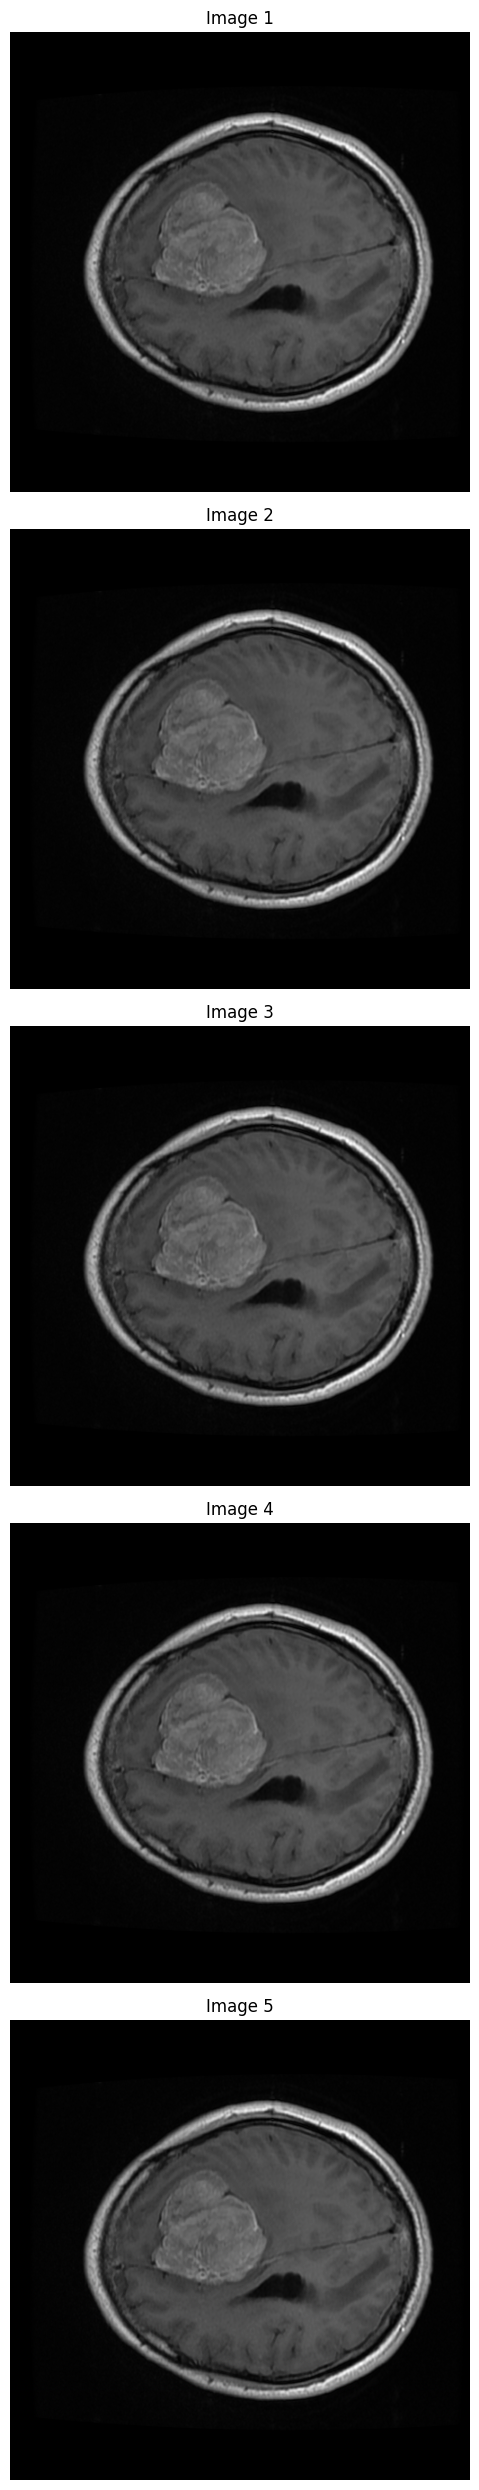

In [4]:
import h5py
import matplotlib.pyplot as plt

# Load the .mat file and the image data within 'cjdata'
with h5py.File('75.mat', 'r') as mat_file:
    img_array = mat_file['cjdata/image'][:]

# Print the shape of the loaded image array
print(f"Image array shape: {img_array.shape}")

# Number of slices to visualize
num_slices = 5  # Adjust this number as needed

# Create a figure with subplots for each slice
plt.figure(figsize=(15, 5 * num_slices))

for i in range(num_slices):
    plt.subplot(num_slices, 1, i + 1)
    plt.imshow(img_array, cmap='gray')  # Visualize the entire 2D image
    plt.title(f'Image {i + 1}')  # Title can be adjusted based on your data
    plt.axis('off')

plt.tight_layout()
plt.show()


['PID', 'image', 'label', 'tumorBorder', 'tumorMask']


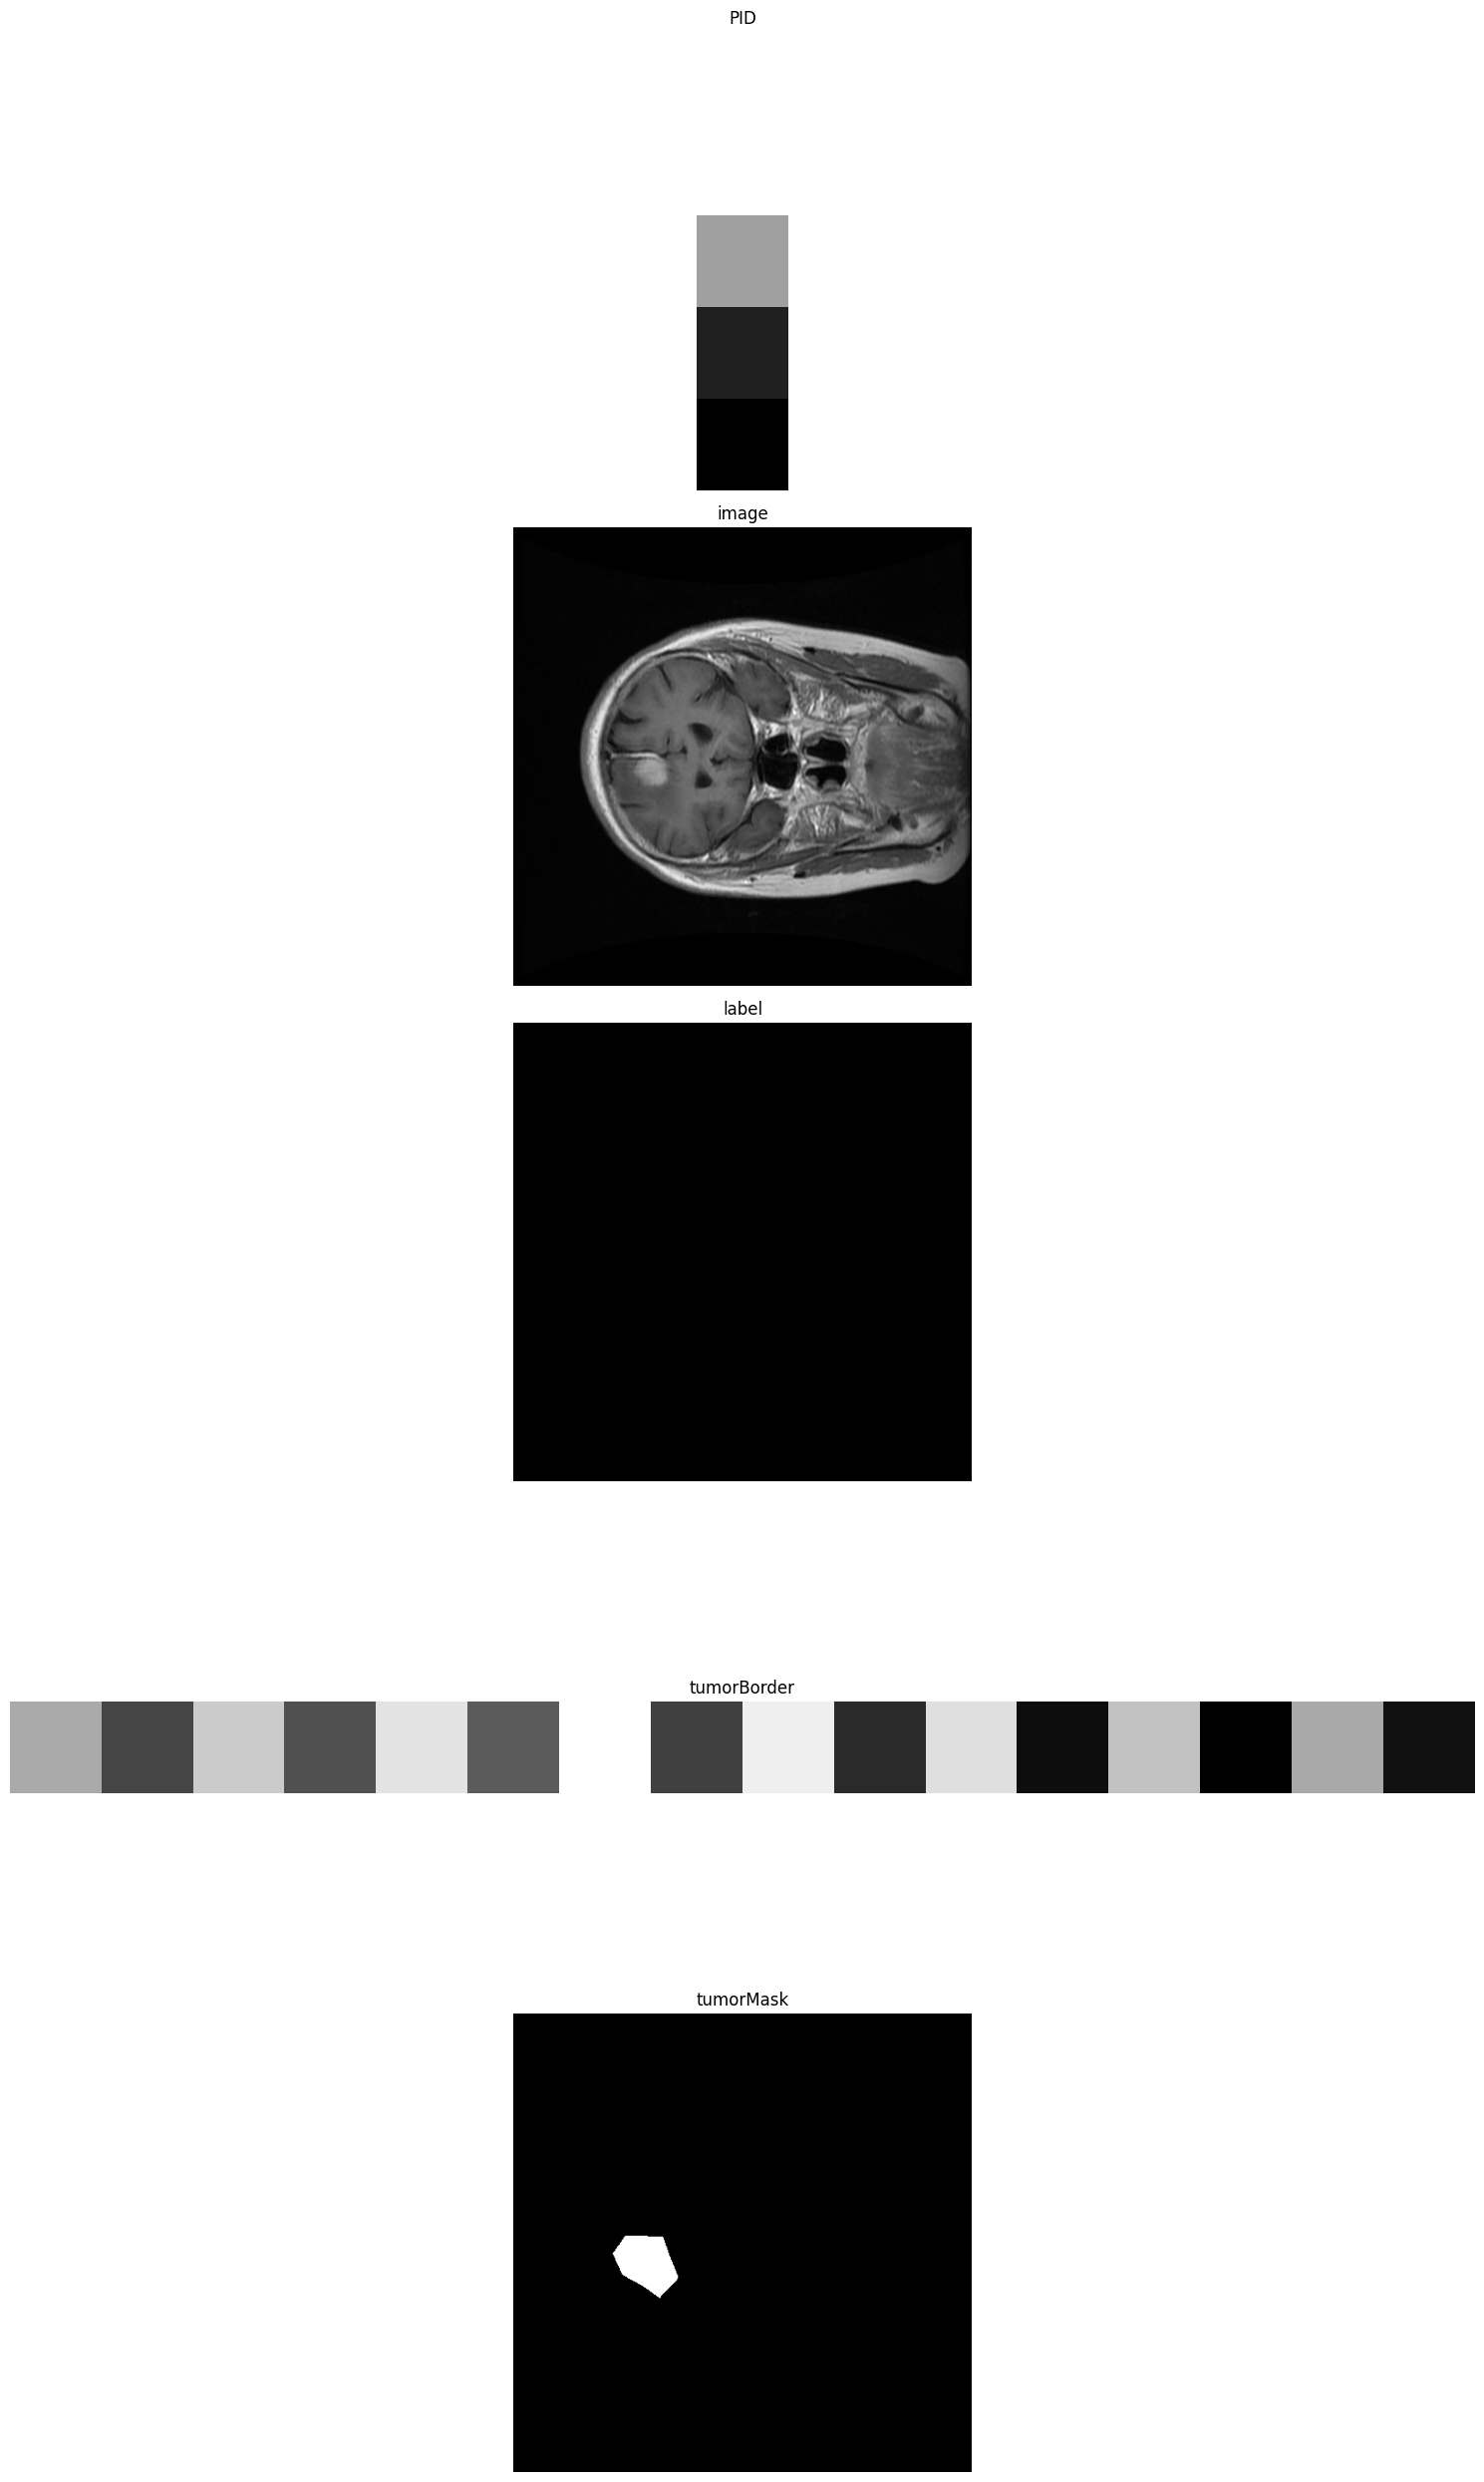

In [5]:
# mask = nib.load('segmented_image.nii.hdr')
# mask_array = mask.get_fdata().astype(np.uint8)
# print(mask_array.shape)
# print(np.unique(mask_array))
# plt.subplot(121)
# plt.imshow(mask_array[:,:,0], cmap='gray')
# plt.subplot(122)
# plt.imshow(mask_array[:,:,67], cmap='gray')
# plt.colorbar()


import h5py
import matplotlib.pyplot as plt
import numpy as np

# Load the .mat file and inspect the contents of 'cjdata'
with h5py.File('3064.mat', 'r') as mat_file:
    cjdata_contents = list(mat_file['cjdata'].keys())
    print(cjdata_contents)  # List all items in 'cjdata'

# Number of items to visualize
num_items = len(cjdata_contents)

# Create a figure with subplots for each item
plt.figure(figsize=(15, 5 * num_items))

# Loop through each item and visualize it
with h5py.File('3064.mat', 'r') as mat_file:
    for i, key in enumerate(cjdata_contents):
        data = mat_file[f'cjdata/{key}'][:]
        ax = plt.subplot(num_items, 1, i + 1)
        
        if data.ndim == 3:
            # If 3D data, visualize a slice in the middle
            mid_slice = data.shape[2] // 2
            ax.imshow(data[:,:,mid_slice], cmap='gray')
            ax.set_title(f'{key} - Slice {mid_slice}')
        elif data.ndim == 2:
            # If 2D data, visualize directly
            ax.imshow(data, cmap='gray')
            ax.set_title(f'{key}')
        else:
            ax.text(0.5, 0.5, f"{key} unsupported dimensions", ha='center', va='center')
        
        ax.axis('off')

plt.tight_layout()
plt.show()


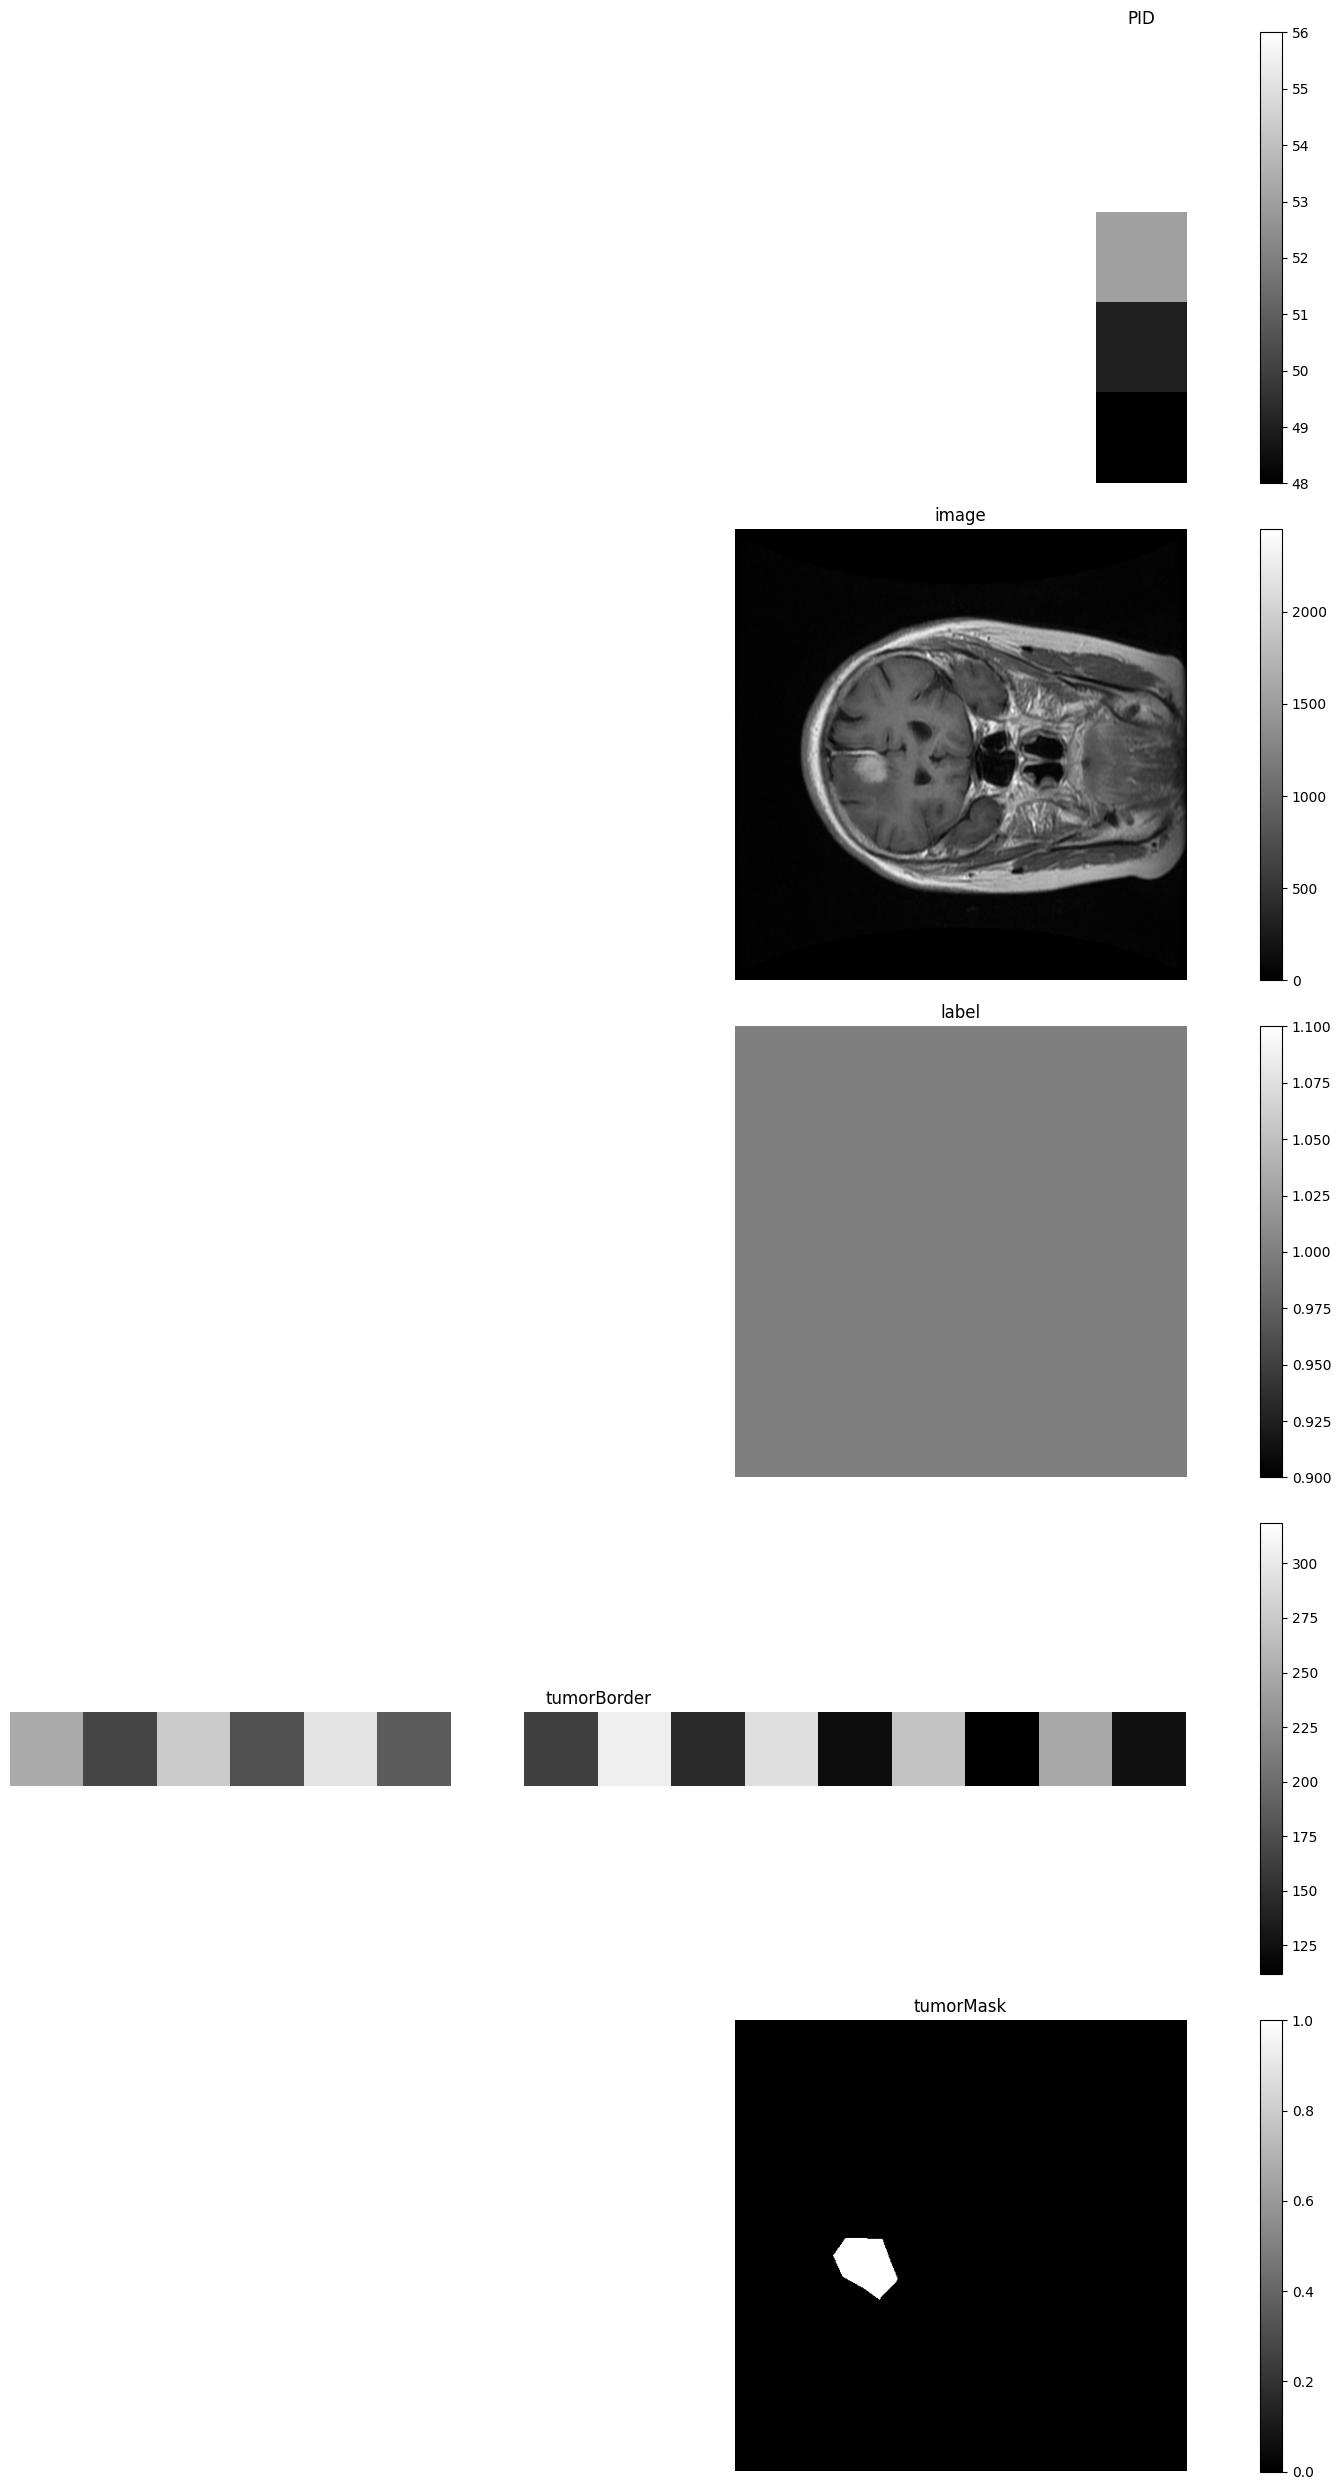

In [6]:
# i = 72
# plt.subplot(131)
# plt.imshow(mask_array[40:215, 40:215, i], cmap='gray')
# plt.subplot(132)
# plt.imshow(mask_array[40:215, 40:215, i+1], cmap='gray')
# plt.subplot(133)
# plt.imshow(mask_array[40:215, 40:215, i+2], cmap='gray')


import h5py
import matplotlib.pyplot as plt

# Load the .mat file and inspect the contents of 'cjdata'
with h5py.File('3064.mat', 'r') as mat_file:
    cjdata_contents = list(mat_file['cjdata'].keys())  # List all items in 'cjdata'

# Number of items to visualize (assuming each key is a different dataset)
num_items = len(cjdata_contents)

# Set the starting index of the slices to visualize
i = 72

# Create a figure with subplots for each dataset
plt.figure(figsize=(15, 5 * num_items))

# Loop through each dataset and visualize it
with h5py.File('3064.mat', 'r') as mat_file:
    for idx, key in enumerate(cjdata_contents):
        data = mat_file[f'cjdata/{key}'][:]
        
        # Create subplots dynamically based on the number of datasets
        plt.subplot(num_items, 1, idx + 1)
        
        # Check if the data is 2D or 3D and visualize accordingly
        if data.ndim == 2:
            # If 2D data, visualize directly
            plt.imshow(data, cmap='gray')
            plt.title(f'{key}')
        elif data.ndim == 3:
            # If 3D data, visualize a slice in the middle (adjust as needed)
            plt.imshow(data[:,:,i], cmap='gray')
            plt.title(f'{key} - Slice {i}')
        else:
            plt.text(0.5, 0.5, f"Unsupported dimensions for {key}", ha='center', va='center')
        
        plt.colorbar()
        plt.axis('off')

plt.tight_layout()
plt.show()



In [7]:
# x = img_array/np.max(img_array)
# print(x.max())
# print(type(x[0,0,0]))
# x = x.astype(np.float32)
# print(type(x[0,0,0]))



import h5py
import numpy as np

# Load the .mat file and the image data
with h5py.File('3064.mat', 'r') as mat_file:
    img_array = mat_file['cjdata/image'][:]  # Assuming 'image' is the dataset key

# Normalize the image array
x = img_array / np.max(img_array)

# Print the maximum value after normalization
print(x.max())

# Print the type of the first element before and after casting to np.float32
print(type(x[0, 0]))

# Convert x to np.float32
x = x.astype(np.float32)

# Print the type of the first element after casting to np.float32
print(type(x[0, 0]))



1.0
<class 'numpy.float64'>
<class 'numpy.float32'>


In [8]:
# print(np.unique(mask_array[:,:,0]))
# print(np.unique(mask_array[:,:,67]))

import h5py
import numpy as np

# Load the .mat file and the image data
with h5py.File('3064.mat', 'r') as mat_file:
    mask_array = mat_file['cjdata/image'][:]  # Assuming 'image' is the dataset key

# Print the unique values in the first column (index 0)
print(np.unique(mask_array[:, 0]))

# Print the unique values in the 68th column (index 67, considering 0-based indexing)
print(np.unique(mask_array[:, 67]))


[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  3  4 21 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 63]


In [9]:
# mask_array[mask_array == 4] = 3
# np.unique(mask_array)


import h5py
import numpy as np

# Load the .mat file and the image data
with h5py.File('3064.mat', 'r') as mat_file:
    mask_array = mat_file['cjdata/image'][:]  # Assuming 'image' is the dataset key

# Replace all occurrences of 4 with 3 in mask_array
mask_array[mask_array == 4] = 3

# Print the unique values in the modified mask_array
print(np.unique(mask_array))


[   0    1    2 ... 2401 2444 2446]


In [1]:
# import numpy as np

# # Assuming mask_array is already defined
# mask_array = np.random.randint(0, 2, (128, 128, 128))  # Example mask array

# black = []
# good = []

# # Ensure the range does not exceed the size of the third dimension
# for i in range(mask_array.shape[2]):
#     if np.all(mask_array[:, :, i] == 0):
#         black.append(i)
#     else:
#         good.append(i)

# print(black)
# print(good)


# import h5py

# with h5py.File('3064.mat', 'r') as mat_file:
#     mask_array = mat_file['cjdata/image'][:]  # Assuming 'image' is the dataset key
#     print(mask_array.shape)

import h5py
import numpy as np

# Load the .mat file and the image data
with h5py.File('3064.mat', 'r') as mat_file:
    mask_array = mat_file['cjdata/image'][:]  # Assuming 'image' is the dataset key

# Normalize the mask_array
x = mask_array / np.max(mask_array)

# Print the maximum value after normalization
print("Max value after normalization:", x.max())

# Print the type of the first element before and after casting to np.float32
print("Type before conversion:", type(x[0, 0]))

# Convert x to np.float32
x = x.astype(np.float32)

# Print the type of the first element after casting to np.float32
print("Type after conversion:", type(x[0, 0]))

# Print the unique values in the mask_array
print("Unique values:", np.unique(mask_array))




Max value after normalization: 1.0
Type before conversion: <class 'numpy.float64'>
Type after conversion: <class 'numpy.float32'>
Unique values: [   0    1    2 ... 2401 2444 2446]


In [11]:
import h5py
import numpy as np

# Load the .mat file and the image data
with h5py.File('3064.mat', 'r') as mat_file:
    mask_array = mat_file['cjdata/image'][:]  # Assuming 'image' is the dataset key

black = []
good = []

# Loop through the columns (second dimension)
for i in range(mask_array.shape[1]):
    if np.all(mask_array[:, i] == 0):
        black.append(i)
    else:
        good.append(i)

print("Columns (slices) with all zeros:", black)
print("Columns (slices) with at least one non-zero value:", good)


Columns (slices) with all zeros: []
Columns (slices) with at least one non-zero value: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 20

In [12]:
import h5py
import numpy as np

# Load the .mat file and the image data
with h5py.File('3064.mat', 'r') as mat_file:
    img_array = mat_file['cjdata/image'][:]  # Assuming 'image' is the dataset key

# Define the slice indices for rows and columns
start_row, end_row = 40, 220  # Adjust according to your desired range
start_col, end_col = 40, 220  # Adjust according to your desired range

# Perform the slicing
subset_img_array = img_array[start_row:end_row, start_col:end_col]

# Print the shape of the subset array
print("Shape of the subset array:", subset_img_array.shape)


Shape of the subset array: (180, 180)


In [13]:
# mask_array[:,:,0].shape

import h5py
import numpy as np

# Load the .mat file and the image data
with h5py.File('3064.mat', 'r') as mat_file:
    mask_array = mat_file['cjdata/image'][:]  # Assuming 'image' is the dataset key

# Print the shape of the first slice (assuming you want to check the shape of a slice)
print(mask_array[:, :].shape)


(512, 512)


In [14]:
# mask_array =  to_categorical(mask_array[:,:,0], num_classes=4)
# mask_array = mask_array.astype(np.uint8)
# mask_array.shape


import h5py
import numpy as np
from keras.utils import to_categorical  # Assuming you are using Keras

# Load the .mat file and the image data
with h5py.File('3064.mat', 'r') as mat_file:
    mask_array = mat_file['cjdata/image'][:]  # Assuming 'image' is the dataset key

# Extract the first slice of mask_array
mask_array_slice = mask_array[:, :]  # Extracting the entire 2D array (assuming the entire mask_array is the slice)

# Ensure values are within the range [0, num_classes-1]
max_value = np.max(mask_array_slice)
if max_value >= 4:
    mask_array_slice = np.clip(mask_array_slice, 0, 3)  # Clip values to range [0, 3] if necessary

# Convert to categorical format
mask_array_categorical = to_categorical(mask_array_slice, num_classes=4)

# Convert to np.uint8
mask_array_uint8 = mask_array_categorical.astype(np.uint8)

# Print the shape of the resulting array
print("Shape after conversion:", mask_array_uint8.shape)




Shape after conversion: (512, 512, 4)


In [15]:
import h5py
import numpy as np

# Load the .mat file and the image data
with h5py.File('3064.mat', 'r') as mat_file:
    mask_array = mat_file['cjdata/image'][:]  # Assuming 'image' is the dataset key

# Access the element at position (0, 0) in mask_array
element = mask_array[0, 0]

# Print the accessed element
print("Element at position (0, 0):", element)


Element at position (0, 0): 0


In [16]:
# train_images_paths = sorted(glob.glob('mpr-3.nifti.hdr'))
# train_masks_paths = sorted(glob.glob('segmented_image.nii.hdr'))
# train_masks_paths.insert(354,'segmented_image.nii.hdr')
# scaler = MinMaxScaler()
# print(len(train_images_paths))
# print(len(train_masks_paths))


import h5py
import numpy as np

# Adjust the file path for the .mat file
mat_file_path = '3064.mat'

# Load data from .mat file using h5py
with h5py.File(mat_file_path, 'r') as mat_file:
    # Assuming 'tumorMask' is the dataset key for the mask data
    mask_data = mat_file['cjdata/tumorMask'][:]  

# Print the shape of loaded mask data for verification
print("Shape of mask_data (from tumorMask):", mask_data.shape)


Shape of mask_data (from tumorMask): (512, 512)


In [17]:
# x_train, x_test, y_train, y_test = train_test_split(train_images_paths, train_masks_paths, test_size=0.1, random_state=42)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# print(len(x_train))
# print(len(x_val))
# print(len(x_test))


import numpy as np
from sklearn.model_selection import train_test_split

# Example lists of file paths (adjust according to your actual paths)
train_images_paths = ['3064.mat', '3065.mat', '3066.mat', ...]
train_masks_paths = ['tumorMask_3064.mat', 'tumorMask_3065.mat', 'tumorMask_3066.mat', ...]

# Split data into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(train_images_paths, train_masks_paths, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Print lengths of the resulting sets
print("Train set length:", len(x_train))
print("Validation set length:", len(x_val))
print("Test set length:", len(x_test))


Train set length: 2
Validation set length: 1
Test set length: 1


In [18]:
import h5py
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical

scaler = MinMaxScaler()

def load_img(img_list):
    train_images = []
    for i, image_path in enumerate(img_list):
        with h5py.File(image_path, 'r') as mat_file:
            image_t1ce = mat_file['cjdata/image'][:]
        
        image_t1ce = image_t1ce / np.max(image_t1ce)
        image_t1ce = image_t1ce.astype(np.float32)
        image_t1ce = image_t1ce[:, :, 30:113]
        
        for j in range(image_t1ce.shape[2]):
            channel = image_t1ce[:, :, j]
            RGB_img = np.repeat(channel[..., np.newaxis], 3, axis=-1)
            train_images.append(RGB_img)
    
    train_images = np.array(train_images)
    return train_images

def load_mask(mask_list):
    train_masks = []
    for i, mask_path in enumerate(mask_list):
        with h5py.File(mask_path, 'r') as mat_file:
            mask = mat_file['cjdata/tumorMask'][:]
        
        mask[mask == 4] = 3
        mask = mask[:, :, 30:113]
        
        for j in range(mask.shape[2]):
            channel = mask[:, :, j]
            channel = to_categorical(channel, num_classes=4)
            channel = channel.astype(np.float32)
            train_masks.append(channel)
    
    train_masks = np.array(train_masks)
    return train_masks

def imageLoader(img_list, mask_list, batch_size):
    L = len(img_list)

    while True:
        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_list[batch_start:limit])
            Y = load_mask(mask_list[batch_start:limit])

            yield (X, Y)

            batch_start += batch_size   
            batch_end += batch_size

# Example usage
train_images_paths = ['3064.mat', '3065.mat', '3066.mat']  # Example list of file paths
train_masks_paths = ['3064.mat', '3065.mat', '3066.mat']  # Assuming the mask data is in the same files

# Split data into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(train_images_paths, train_masks_paths, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print("Train set length:", len(x_train))
print("Validation set length:", len(x_val))
print("Test set length:", len(x_test))

# Example generator usage
batch_size = 1
train_generator = imageLoader(x_train, y_train, batch_size)


Train set length: 1
Validation set length: 1
Test set length: 1


In [19]:
import h5py
import numpy as np
from keras.utils import to_categorical

def load_mask(mask_list):
    train_masks = []
    for i, mask_path in enumerate(mask_list):
        with h5py.File(mask_path, 'r') as mat_file:
            mask = mat_file['cjdata/tumorMask'][:]  # Assuming 'tumorMask' is the dataset key for the mask data

        mask[mask == 4] = 3  # Reassign mask values 4 to 3

        # If mask is 2D, we don't need to slice along the third dimension
        if mask.ndim == 2:
            channel = mask
            channel = to_categorical(channel, num_classes=4)  # Convert to categorical format with 4 classes
            channel = channel.astype(np.float32)
            train_masks.append(channel)
        elif mask.ndim == 3:
            mask = mask[:, :, 30:113]  # Extract the specific slices
            for j in range(mask.shape[2]):
                channel = mask[:, :, j]
                channel = to_categorical(channel, num_classes=4)  # Convert to categorical format with 4 classes
                channel = channel.astype(np.float32)
                train_masks.append(channel)
    
    train_masks = np.array(train_masks)
    return train_masks

# Example usage is
train_masks_paths = ['3064.mat', '7.mat', '75.mat']  # Example list of file paths

# Load mask data for the first 10 files in the list
cc = load_mask(train_masks_paths[:10])

# Print the shape of the loaded mask array
print(cc.shape)


(3, 512, 512, 4)


In [20]:
import h5py
import numpy as np
from keras.utils import to_categorical

def load_mask(mask_list):
    train_masks = []
    for i, mask_path in enumerate(mask_list):
        with h5py.File(mask_path, 'r') as mat_file:
            mask = mat_file['cjdata/tumorMask'][:]  # Assuming 'tumorMask' is the dataset key for the mask data

        mask[mask == 4] = 3  # Reassign mask values 4 to 3

        # If mask is 2D, we don't need to slice along the third dimension
        if mask.ndim == 2:
            channel = mask
            channel = to_categorical(channel, num_classes=4)  # Convert to categorical format with 4 classes
            channel = channel.astype(np.float32)
            train_masks.append(channel)
        elif mask.ndim == 3:
            mask = mask[:, :, 30:113]  # Extract the specific slices
            for j in range(mask.shape[2]):
                channel = mask[:, :, j]
                channel = to_categorical(channel, num_classes=4)  # Convert to categorical format with 4 classes
                channel = channel.astype(np.float32)
                train_masks.append(channel)
    
    train_masks = np.array(train_masks)
    return train_masks

# Example usage
train_masks_paths = ['3064.mat', '7.mat', '75.mat']  # Example list of file paths

# Load mask data for the first 10 files in the list
cc = load_mask(train_masks_paths[:10])

# Print the shape of the loaded mask array
print(cc.shape)

# Print the unique values in the first mask in the array
print(np.unique(cc[0]))


(3, 512, 512, 4)
[0. 1.]


In [21]:
batch_size = 1
IMAGE_SIZE = 240
NUM_CLASSES = 4

In [22]:
import h5py
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Function to load images
def load_img(img_list):
    train_images= []
    for i, image_path in enumerate(img_list):    
        with h5py.File(image_path, 'r') as mat_file:
            image_t1ce = mat_file['cjdata/image'][:]
        image_t1ce = image_t1ce / np.max(image_t1ce)
        image_t1ce = image_t1ce.astype(np.float32)
        # Process 2D images directly, assuming the original code is based on 3D processing
        for j in range(image_t1ce.shape[-1]):
            channel = image_t1ce[:, :]
            RGB_img = np.repeat(channel[..., np.newaxis], 3, axis=-1)
            train_images.append(RGB_img)
    
    train_images = np.array(train_images)
    return train_images

# Function to load masks
def load_mask(mask_list):
    train_masks = []
    for i, mask_path in enumerate(mask_list):
        with h5py.File(mask_path, 'r') as mat_file:
            mask = mat_file['cjdata/tumorMask'][:]
        
        mask[mask == 4] = 3  # Reassign mask values 4 to 3

        if mask.ndim == 2:
            channel = mask
            channel = to_categorical(channel, num_classes=4)
            channel = channel.astype(np.float32)
            train_masks.append(channel)
        elif mask.ndim == 3:
            mask = mask[:, :, 30:113]
            for j in range(mask.shape[2]):
                channel = mask[:, :, j]
                channel = to_categorical(channel, num_classes=4)
                channel = channel.astype(np.float32)
                train_masks.append(channel)
    
    train_masks = np.array(train_masks)
    return train_masks

# Data generator function
def imageLoader(img_list, mask_list, batch_size):
    L = len(img_list)

    while True:
        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_list[batch_start:limit])
            Y = load_mask(mask_list[batch_start:limit])

            yield (X, Y)  # a tuple with two numpy arrays with batch_size samples    

            batch_start += batch_size   
            batch_end += batch_size

# Define file paths
train_images_paths = ['3064.mat', '7.mat', '75.mat']
train_masks_paths = ['3064.mat', '7.mat', '75.mat']

# Insert additional file if needed (as in the original description)
# train_masks_paths.insert(354, '3064.mat')  # Remove this line if not needed

# Ensure the paths are sorted and matched correctly (if they need to be in a specific order)
train_images_paths = sorted(train_images_paths)
train_masks_paths = sorted(train_masks_paths)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(train_images_paths, train_masks_paths, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print(len(x_train))
print(len(x_val))
print(len(x_test))

# Create the training data generator
batch_size = 1
train_datagen = imageLoader(x_train, y_train, batch_size)

# Example usage to get one batch of data
X, Y = next(train_datagen)
print(X.shape)
print(Y.shape)
print(np.unique(Y[0]))


1
1
1
(512, 512, 512, 3)
(1, 512, 512, 4)
[0. 1.]


In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

# Define the convolution block
def convolution_block(block_input, num_filters=128, kernel_size=3, dilation_rate=1, padding="same", use_bias=False):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal())(block_input)
    x = layers.BatchNormalization()(x)
    return tf.nn.relu(x)

# Define the Dilated Spatial Pyramid Pooling block
def DilatedSpatialPyramidPooling(dspp_input):
    dims = tf.shape(dspp_input)
    x = layers.AveragePooling2D(pool_size=(dims[1], dims[2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[1] // tf.shape(x)[1], dims[2] // tf.shape(x)[2]), interpolation="bilinear",
    )(x)
    print("Inside dspp, out_pool: ", tf.shape(out_pool))
    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output

# Example usage with sample input
input_tensor = tf.random.normal([1, 128, 128, 3])  # Example input tensor with batch size 1
output_tensor = DilatedSpatialPyramidPooling(input_tensor)
print("Output shape: ", output_tensor.shape)


Inside dspp, out_pool:  tf.Tensor([  1 128 128 128], shape=(4,), dtype=int32)
Output shape:  (1, 128, 128, 128)


In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras

# Define the convolution block with proper activation handling
def convolution_block(block_input, num_filters=128, kernel_size=3, dilation_rate=1, padding="same", use_bias=False):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding=padding,
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal())(block_input)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)  # Apply ReLU activation here
    return x

# Define the Dilated Spatial Pyramid Pooling block for 2D input
def DilatedSpatialPyramidPooling(dspp_input):
    out_1 = convolution_block(dspp_input, num_filters=128, kernel_size=1)
    out_6 = convolution_block(dspp_input, num_filters=128, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, num_filters=128, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, num_filters=128, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_1, out_6, out_12, out_18])
    output = convolution_block(x, num_filters=128, kernel_size=1)
    return output

# Load ResNet50 model without the top layer
resnet50 = keras.applications.ResNet50(
    weights="imagenet", include_top=False, input_shape=(240, 240, 3))
resnet50.summary()

# Use the output of ResNet50 as input to the DilatedSpatialPyramidPooling
resnet_output = resnet50.output

# Apply Dilated Spatial Pyramid Pooling
dspp_output = DilatedSpatialPyramidPooling(resnet_output)

# Define the rest of the model
x = layers.Conv2D(256, (3, 3), padding="same", activation="relu")(dspp_output)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(4, (1, 1), activation="softmax")(x)  # Assuming 4 classes for segmentation

# Create the model
model = models.Model(inputs=resnet50.input, outputs=x)

# Print the model summary
model.summary()

# Example usage with a batch of images
example_input = tf.random.normal([1, 240, 240, 3])  # Example input tensor with batch size 1
example_output = model(example_input)
print("Output shape: ", example_output.shape)


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 246, 246,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 120, 120,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 120, 120,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 120, 120,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 122, 122,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 60, 60,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 60, 60,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 60, 60,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 60, 60,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 60, 60,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 60, 60,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 60, 60,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 60, 60,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 60, 60,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 60, 60,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 60, 60,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 246, 246,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 120, 120,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 120, 120,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 120, 120,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 122, 122,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 60, 60,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 60, 60,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 60, 60,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 60, 60,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 60, 60,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 60, 60,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 60, 60,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 60, 60,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 60, 60,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 60, 60,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 60, 60,    │      1,024 │ conv2_block1_3_c

 Total params: 31,884,164 (121.63 MB)

 Trainable params: 31,828,740 (121.42 MB)

 Non-trainable params: 55,424 (216.50 KB)

Output shape:  (1, 8, 8, 4)


In [25]:
from tensorflow.keras import layers, models, Input
import tensorflow.keras.backend as K
import tensorflow as tf

def convolution_block(block_input, num_filters=128, kernel_size=3, dilation_rate=1, padding="same", use_bias=False):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding=padding,
        use_bias=use_bias,
        kernel_initializer='he_normal')(block_input)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def DilatedSpatialPyramidPooling(dspp_input):
    out_1 = convolution_block(dspp_input, num_filters=128, kernel_size=1)
    out_6 = convolution_block(dspp_input, num_filters=128, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, num_filters=128, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, num_filters=128, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_1, out_6, out_12, out_18])
    output = convolution_block(x, num_filters=128, kernel_size=1)
    return output

def DeeplabV3Plus(image_size, num_classes):
    model_input = Input(shape=(image_size, image_size, 3))
    resnet50 = tf.keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=model_input
    )
    resnet50.trainable = False
    
    x = resnet50.get_layer("conv4_block6_2_relu").output
    print("dspp in: ", x.shape)
    x = DilatedSpatialPyramidPooling(x)
    print("dspp out: ", x.shape)
    
    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)
    
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=24, kernel_size=1)
    print("encoder out: ", input_a.shape)
    print("first out: ", input_b.shape)
    
    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), activation='softmax', padding="same")(x)
    return models.Model(inputs=model_input, outputs=model_output)

# Example usage:
image_size = 256  # Adjust according to your image size
num_classes = 4   # Adjust according to your number of classes
deeplab_model = DeeplabV3Plus(image_size, num_classes)
deeplab_model.summary()


dspp in:  (None, 16, 16, 256)
dspp out:  (None, 16, 16, 128)
encoder out:  (None, 64, 64, 128)
first out:  (None, 64, 64, 24)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 9,633,252 (36.75 MB)

 Trainable params: 1,309,492 (5.00 MB)

 Non-trainable params: 8,323,760 (31.75 MB)

In [26]:
model = DeeplabV3Plus(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)

dspp in:  (None, 15, 15, 256)
dspp out:  (None, 15, 15, 128)
encoder out:  (None, 60, 60, 128)
first out:  (None, 60, 60, 24)


In [27]:
from tensorflow.keras import layers, models, Input
import tensorflow.keras.backend as K
import tensorflow as tf

def convolution_block(block_input, num_filters=128, kernel_size=3, dilation_rate=1, padding="same", use_bias=False):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding=padding,
        use_bias=use_bias,
        kernel_initializer='he_normal')(block_input)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def DilatedSpatialPyramidPooling(dspp_input):
    out_1 = convolution_block(dspp_input, num_filters=128, kernel_size=1)
    out_6 = convolution_block(dspp_input, num_filters=128, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, num_filters=128, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, num_filters=128, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_1, out_6, out_12, out_18])
    output = convolution_block(x, num_filters=128, kernel_size=1)
    return output

def DeeplabV3Plus(image_size, num_classes):
    model_input = Input(shape=(image_size, image_size, 3))
    resnet50 = tf.keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=model_input
    )
    resnet50.trainable = False
    
    x = resnet50.get_layer("conv4_block6_2_relu").output
    print("dspp in: ", x.shape)
    x = DilatedSpatialPyramidPooling(x)
    print("dspp out: ", x.shape)
    
    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)
    
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=24, kernel_size=1)
    print("encoder out: ", input_a.shape)
    print("first out: ", input_b.shape)
    
    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), activation='softmax', padding="same")(x)
    return models.Model(inputs=model_input, outputs=model_output)

# Example usage:
IMAGE_SIZE = 256  # Adjust according to your image size
NUM_CLASSES = 4   # Adjust according to your number of classes
model = DeeplabV3Plus(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)
model.summary()


dspp in:  (None, 16, 16, 256)
dspp out:  (None, 16, 16, 128)
encoder out:  (None, 64, 64, 128)
first out:  (None, 64, 64, 24)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 9,633,252 (36.75 MB)

 Trainable params: 1,309,492 (5.00 MB)

 Non-trainable params: 8,323,760 (31.75 MB)

In [28]:
import os

# Define the directory for saving checkpoints
checkpoint_dir = '/Dataset/checkpoint/'
os.makedirs(checkpoint_dir, exist_ok=True)

# Define the checkpoint filepath with .keras extension
checkpoint_filepath = checkpoint_dir + 'model_checkpoint.keras'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='loss',
    save_best_only=True
)


In [29]:
import tensorflow.keras.backend as K

epsilon = 1e-7

def dice_coeff(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + epsilon) / (K.sum(y_true_f) + K.sum(y_pred_f) + epsilon)
    return dice


In [30]:
def dice_loss(y_true, y_pred):
    dice = dice_coeff(y_true, y_pred)
    return 1 - dice

In [31]:
from tensorflow.keras.optimizers import Adam

# Assuming dice_coeff function is defined as described earlier

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=dice_loss,
    metrics=[dice_coeff],  # Use dice_coeff as a metric
)


In [32]:
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

# Example model definition
def DeeplabV3Plus(image_size, num_classes):
    model_input = Input(shape=(image_size, image_size, 3))
    resnet50 = keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=model_input
    )
    resnet50.trainable = False
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)
    
    input_a = UpSampling2D(size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]), interpolation="bilinear")(x)
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = Conv2D(24, (1, 1), activation='relu')(input_b)
    
    x = Concatenate(axis=-1)([input_a, input_b])
    x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
    x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
    x = UpSampling2D(size=(image_size // x.shape[1], image_size // x.shape[2]), interpolation="bilinear")(x)
    model_output = Conv2D(num_classes, kernel_size=(1, 1), activation='softmax', padding="same")(x)
    
    model = Model(inputs=model_input, outputs=model_output)
    return model

# Create the model
IMAGE_SIZE = 512
NUM_CLASSES = 4  # Adjust according to your problem

model = DeeplabV3Plus(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (example, adjust as per your data and requirements)
history = model.fit(train_datagen, epochs=5, steps_per_epoch=1, callbacks=[checkpoint_callback])


Epoch 1/5
